In [229]:
import random
import numpy as np
import matplotlib.pyplot as plt
import time
import math
import psutil
import jdc
from tqdm import tqdm
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)        

## Parameter

In [230]:
class r0733300:
    def __init__(self):
        self.LAMBDA = 100  # Lambda represents the size of population
        self.MU = 100 # Mu represents the size of offsprings
        self.distanceMatrix = []  # distanceMatrix saves the cost between each two places
        self.K_TOURNAMENT_SIZE = 3  # this is the size of selection
        self.K_TOURNAMENT_SIZE_elimination = 10  # this is the size of selection
        self.alpha = 0.05  # alpha is the mutation rate
        self.iteration = 0  # iteration number
        self.converge = 0.018  # difference between mean and best evalue. If (mean- best)/best < converge, it converges.
        self.rank = 50
        self.rank_list = []
        self.s = 0.99999
        self.lsp_size = 1
        self.selectiveIni = 50
        self.alphaDiversity = 0.2
        self.K_TOURNAMENT_Size_Diversify = 3
        self.K_TOURNAMENT_SIZE_elimination_Diversify = 3
        self.LAMBDA_Diversify = 100
        self.selective_Diversify = 50
        self.EliteNumber = 3

## Initialization
###  Random Initialization

In [231]:
class r0733300(r0733300):
    def initialize(self, matrix, lamda):
        print(random)
        initialization = []
        n = len(matrix)
        for i in range(0, lamda):  # generate population of LAMBDA
            candidate = np.random.permutation(n)
            candidate2 = np.ndarray.tolist(candidate)
            initialization.append([candidate2, self.calculate_distance(candidate2 ,self.distanceMatrix)])
            
        return initialization


### Selective Initialization

In [232]:
from typing import DefaultDict
import random
class r0733300(r0733300):
    def selectiveInialization(self, k):
        cost = 0
        cityNumber = len(self.distanceMatrix)
        route = [0] * cityNumber
        unvisited = np.arange(cityNumber)
        front = random.randrange(0, cityNumber)
        # front = 0
        route[0] = front
        unvisited = np.delete(unvisited, front)
        counter = 1
        while(len(unvisited) > 0):
            # print(len(unvisited))
            distance = self.distanceMatrix[front]
            distance = np.argsort(distance)
            candidates = distance[1:1+k]
            
            candidates_unvisited = []
            for i in candidates:
                if i in unvisited:
                    candidates_unvisited.append(i)


            if(len(candidates_unvisited) != 0):
                next = candidates_unvisited[random.randrange(0, len(candidates_unvisited))]
                route[counter] = next
                unvisited = np.delete(unvisited, np.where(unvisited == next))
                cost += self.distanceMatrix[front][next]
                front = next
                counter +=1
                # print('k')
            else:
                next = unvisited[random.randrange(0, len(unvisited))]
                route[counter] = next
                unvisited = np.delete(unvisited, np.where(unvisited == next))
                cost += self.distanceMatrix[front][next]
                front = next
                counter +=1
                # print('not K')

        cost += self.distanceMatrix[route[0]][route[-1]]
        # print(cost)
        # print(route)
        
        return [route,cost]

class r0733300(r0733300):
    def selectiveInializationBatch(self, k, lamda):
        parents = []
        for i in tqdm(range(0, lamda)):
        # for i in range(0, self.LAMBDA):
            # print(i) 
            parents.append(self.selectiveInialization(k))
        
        return parents

### Greedy Initialization

In [233]:
# Python3 program for the above approach

from typing import DefaultDict


INT_MAX = float("inf")	

# Function to find the minimum
# cost path for all the paths
class r0733300(r0733300):
	def findMinRoute(self, tsp,k):
		sum = 0
		counter = 0
		j = 0
		i = k
		min = INT_MAX
		min_city = 0
		visitedRouteList = DefaultDict(int)

		# Starting from the 0th indexed
		# city i.e., the first city
		visitedRouteList[i] = 1
		route = [0] * len(tsp)
		route[0] = i
		counter += 1

		# Traverse the adjacency
		# matrix tsp[][]
		while(True):

			# Corner of the Matrix
			if counter >= len(tsp[i])  :
				break

			# If this path is unvisited then
			# and if the cost is less then
			# update the cost
			if (j != i and (visitedRouteList[j] == 0)):
				if tsp[i][j] <= min:
					min = tsp[i][j]
					min_city = j

			j += 1

			# Check all paths from the
			# ith indexed city
			if j == len(tsp[i]):
				min = INT_MAX
				visitedRouteList[min_city] = 1
				route[counter] = min_city
				j = 0
				i = route[counter]
				counter += 1
				min_city=0
       
       
       


		# Update the ending city in array
		# from city which was last visited
		# i = route[counter - 1]

		# for j in range(len(tsp)):

		# 	if (i != j) and tsp[i][j] < min:
		# 		min = tsp[i][j]
		# 		route[counter] = j

		sum =0
		for i in range(len(route)-1):
			sum += tsp[route[i]][route[i+1]]
		sum += tsp[route[len(route)-1]][route[0]]

		# Started from the node where
		# we finished as well.
		# print("Minimum Cost is :", sum)
		# print(route)
		# print(np.sort(route))
		return [route,sum]

class r0733300(r0733300):
    def greedyInializationBatch(self, distanceMatrix, lamda):
        parents = []
        for i in tqdm(range(0, lamda)):
            # print(i) 
            k = random.randrange(0,len(distanceMatrix))
            parents.append(self.findMinRoute(distanceMatrix,k))
        
        return parents
	# # Driver Code
	# file = open("tour1000(1).csv")
	# tsp = np.loadtxt(file, delimiter=",")
	# findMinRoute(tsp,20)


## Calculate Distance

In [234]:
class r0733300(r0733300):
        def calculate_distance(self, permutation, distanceMatrix):
            # print(permutation_mu[0])
            total = 0
            length = len(permutation) - 1

            index_last = permutation[length]
            index_ini = permutation[0]
            # print(index_last)
            # print(index_ini)
            total += self.distanceMatrix[index_last][index_ini]

            for i in range(0, length):
                index1 = permutation[i]
                index2 = permutation[i + 1]
                # print(self.distanceMatrix[index1][index2])
                if distanceMatrix[index1][index2] == float('inf'):
                    total += 1000000000
                    # break
                else:
                    total += self.distanceMatrix[index1][index2]
            return total

## Selection

In [235]:
class r0733300(r0733300):
    def k_tournament_selection(self, solutions, k):  # select K_TOURNAMENT random and select the best within
        random_list = random.sample(range(0,len(solutions)),k)
        # print(random_list)
        best = solutions[random_list[0]]

        for i in random_list:
            if solutions[i][1]< best[1]:
                best = solutions[i]
        return best
    
    def calculate_rank_list(self,iteration ):
        self.rank_list = []
        if(self.s >=1.551282966377186e-220):
            self.s = self.s ** 2    
        # a =  (1-self.s)/((1-self.rank)**2)
        a =  math.log(self.s)/(self.rank-1)
        # print(a)
        q_list = []
        for i in range(1,self.rank+1):
            # q = a* ((i-self.rank)**2) + self.s
            q =  math.exp(a * (i-1))
            q_list.append(q)

        rank_sum = sum(q_list)

        for i in range(1,self.rank+1):
            self.rank_list.append(sum(q_list[:i])/rank_sum)
    
        # print(self.rank_list)
        return 0
    
    def ranking_selection(self,solutions, fitnesses):

        popu_fit = zip(fitnesses,solutions)
        popu_fit_sorted = sorted(popu_fit)
        sort_popu = [element for _, element in popu_fit_sorted]

        a= np.random.random()
        for i in range(self.rank):
            if(a<self.rank_list[i]):
                return sort_popu[i]
    
    
    

## Mutation

In [236]:
class r0733300(r0733300):
    def mutation_swap(self, individual, alpha):
        permutation = individual[0]

        length = len(permutation)
        random_list = random.sample(range(0, length -1),2)
        index1 = np.min(random_list)
        index2 = np.max(random_list)

        if (np.random.random() < alpha):
            temp = permutation[index1]
            permutation[index1] = permutation[index2]
            permutation[index2] = temp

        return [permutation, self.calculate_distance(permutation, self.distanceMatrix)]

    def mutation_insert(self, individual, alpha):
        permutation = individual[0]
        length = len(permutation)
        random_list = random.sample(range(0, length -1),2)
        index1 = np.min(random_list)
        index2 = np.max(random_list)

        if (np.random.random() < alpha):
            later = permutation[index2]
            permutation.pop(index2)
            permutation.insert(index1,later)

        return [permutation, self.calculate_distance(permutation, self.distanceMatrix)]

    
    def mutation_scramble(self, permutation_mu):
        permutation = permutation_mu

        permutation_new = permutation
        length = len(permutation)
        random_list = random.sample(range(0, length -1),2)
        index1 = np.min(random_list)
        index2 = index1 +5
        if (np.random.random() < permutation_mu[1]):
            begin = permutation[0:index1]
            middle = permutation[index1:index2]
            end = permutation[index2:]
            random.shuffle(middle)
            permutation_new = begin+middle+end
        

        return permutation_new

## Recombination

In [237]:
class r0733300(r0733300):
    #order crossover
    def orderCrossover(self, individual1, individual2):
        permutation1 = individual1[0]
        permutation2 = individual2[0]
        
        length = len(permutation2)
        # print("length1 " + str(len(permutation1)))
        # print("length2 " + str(len(permutation2)))
        random_list = random.sample(range(0, length -1),2)
        index1 = np.min(random_list)
        index2 = np.max(random_list)

        offspring = permutation1[index1:index2+1]
        for i in range(length):
            newcity = permutation2[i]
            if(newcity not in offspring):
                offspring.append(newcity)
                
        # if(len(offspring) == 99):
        #     print(np.sort(permutation1))
        #     print(np.sort(permutation2))
        # print("offspring " + str(len(offspring)))
        return [offspring, self.calculate_distance(offspring, self.distanceMatrix)]
   
    def recominbation_crossover(self, individual1, individual2):
        permutation1 = individual1[0]
        permutation2 = individual2[0]

        length = len(permutation1)
        random_list = random.sample(range(0, length -1),2)
        index1 = np.min(random_list)
        index2 = np.max(random_list)
        # index1 = 0
        # index2 = int(length/2)

        offspring = []
        not_yet_used = []
        for i in range(0, length):
            offspring.append(-1)
        for i in range(index1, index2 + 1):
            offspring[i] = permutation1[i]
        for i in range(index2 + 1, length):
            if permutation2[i] in offspring:
                continue
            else:
                not_yet_used.append(permutation2[i])
        for i in range(0, index2 + 1):
            if permutation2[i] in offspring:
                continue
            else:
                not_yet_used.append(permutation2[i])
        j = 0
        for i in range(index2 + 1, length):
            offspring[i] = not_yet_used[j]
            j += 1
        for i in range(0, index1):
            offspring[i] = not_yet_used[j]
            j += 1


        # beta = random.random()/10
        # alpha = max(0,permutation_mu1[1] + beta* (permutation_mu1[1]-permutation_mu2[1]))
        # print(alpha)
        # print(alpha)

        return [offspring, self.calculate_distance(offspring, self.distanceMatrix)]
        # return [offspring, 0]

    def pmx_crossover(self,permutation1, permutation2):
        length = len(permutation1)
        random_list = random.sample(range(0, length -1),2)
        index1 = np.min(random_list)
        index2 = np.max(random_list)

        # print(index1,index2)

        parent1_middle = permutation1[index1:index2]
        parent2_middle = permutation2[index1:index2]

        temp_child1 = permutation1[:index1] + parent2_middle + permutation1[index2:]
        temp_child2 = permutation2[:index1] + parent1_middle + permutation2[index2:]
        # print(temp_child2)
        relations = []
        for i in range(len(parent1_middle)):
            relations.append([parent2_middle[i], parent1_middle[i]])

        # print(relations)

        child1 = self.recursion1(temp_child1, index1, index2,parent1_middle,parent2_middle,relations)
        child2 = self.recursion2(temp_child2, index1, index2,parent1_middle,parent2_middle,relations)

        child1 = np.ndarray.tolist(child1)
        child2 = np.ndarray.tolist(child2)

        
        # print(child1)
        # print(child2)
        
        return child1, child2

    def recursion1(self,temp_child1, index1, index2,parent1_middle,parent2_middle,relations):
        child = np.array([0 for i in range(len(temp_child1))])
        for i,j in enumerate(temp_child1[:index1]):
            c=0
            for x in relations:
                if j == x[0]:
                    child[i]=x[1]
                    c=1
                    break
            if c==0:
                child[i]=j
        j=0
        for i in range(index1,index2):
            child[i]=parent2_middle[j]
            j+=1

        for i,j in enumerate(temp_child1[index2:]):
            c=0
            for x in relations:
                if j == x[0]:
                    child[i+index2]=x[1]
                    c=1
                    break
            if c==0:
                child[i+index2]=j
        child_unique=np.unique(child)
        if len(child)>len(child_unique):
            child=self.recursion1(child, index1, index2,parent1_middle,parent2_middle,relations)
        return(child)

    def recursion2(self, temp_child2, index1, index2,parent1_middle,parent2_middle,relations):
        child = np.array([0 for i in range(len(temp_child2))])
        for i,j in enumerate(temp_child2[:index1]):
            c=0
            for x in relations:
                if j == x[1]:
                    child[i]=x[0]
                    c=1
                    break
            if c==0:
                child[i]=j
        j=0
        for i in range(index1,index2):
            child[i]=parent1_middle[j]
            j+=1

        for i,j in enumerate(temp_child2[index2:]):
            c=0
            for x in relations:
                if j == x[1]:
                    child[i+index2]=x[0]
                    c=1
                    break
            if c==0:
                child[i+index2]=j
        child_unique=np.unique(child)
        # print(child)
        if len(child)>len(child_unique):
            child=self.recursion2(child, index1, index2,parent1_middle,parent2_middle,relations)
        return(child)

    # def eliminate(self, solutions1, offspring,fitnesses):
    #     return sorted(solutions1 + offspring, key=lambda permutation: self.calculate_distance(permutation))[
    #             :self.LAMBDA]

## Elimination

In [238]:
class r0733300(r0733300):
    def eliminate_lamda_mu(self, population):

        objectives = []
        for individual in population:
            objectives.append(self.calculate_distance(individual))

        popu_fit = zip(objectives,population)
        popu_fit_sorted = sorted(popu_fit)
        sort_popu = [element for _, element in popu_fit_sorted]

        return sort_popu[0:self.land_size], objectives[0:self.land_size]

    def eliminate_k_turnament(self, population,k):
        population_new = []
        # fitnesses_new = []


        # objectives = []
        # for individual in population:
        #     objectives.append(self.calculate_distance(individual))

        # # objectives_weight = objectives.copy()

        length = len(population)
        for i in range(self.LAMBDA):
            random_list = random.sample(range(0, length),k)
            best = population[random_list[0]]
            
            for j in random_list:
                if (population[j][1] < best[1]):
                    best = population[j]

            population_new.append(best)
            
        
        return population_new

## LSP

In [239]:
class r0733300(r0733300):
    def lsp_2_opt(self, permutation):

        best_fitness = self.calculate_distance(permutation)
        best_permutation = permutation

        # print('ini' + str(permutation))
        # print(best_fitness)
        length = len(permutation)
        for i in range(length-3):
            for j in range(i+2, length-1):
                copy1 = permutation.copy()
                # print('copy1' + str(permutation))
                a = permutation[i]
                b = permutation[i+1]
                c = permutation[j]
                d = permutation[j+1]

                a_copy = a
                b_copy = b

                copy1[i] = c
                copy1[i+1] = d
                copy1[j] = a_copy
                copy1[j+1] = b_copy

                

                copy_fitness = self.calculate_distance(copy1)
                if(copy_fitness<best_fitness):
                    best_fitness = copy_fitness
                    best_permutation = copy1

                    # print('modified    ' + str(best_permutation))
                    # print(best_fitness)


        # print('mod' + str(best_permutation))
        # print(best_fitness)
        return best_permutation


    def lsp_2_opt_symmetry(self, permutation):

        best_fitness = self.calculate_distance(permutation)
        best_permutation = permutation

        # print('ini' + str(permutation))
        # print(best_fitness)
        length = len(permutation)
        for i in range(int(length/2)-1):
            copy1 = permutation.copy()
            # print('copy1' + str(permutation))
            a = permutation[i]
            b = permutation[i+1]
            c = permutation[length -i-2]
            d = permutation[length -i -1]

            a_copy = a
            b_copy = b

            copy1[i] = c
            copy1[i+1] = d
            copy1[length -i-2] = a_copy
            copy1[length-i - 1] = b_copy

            

            copy_fitness = self.calculate_distance(copy1)
            if(copy_fitness<best_fitness):
                best_fitness = copy_fitness
                best_permutation = copy1

                # print('modified    ' + str(best_permutation))
                # print(best_fitness)


        # print('mod' + str(best_permutation))
        # print(best_fitness)
        return best_permutation

## Plot

In [240]:
class r0733300(r0733300):
    def plotFitness(self, meanfitnesses, bestfitnesses):
        plt.figure()
        plt.plot(range(len(meanfitnesses)), meanfitnesses)
        plt.plot(range(len(meanfitnesses)), bestfitnesses)
        plt.legend(['Mean Fitness','Best Fitness'],loc = 'upper left')
        plt.show()

## Diversify

### Diversity Matrix

In [241]:
class r0733300(r0733300):
    def calculateDiveristy(self, population):
        P = len(population)
        L = len(population[0][0])
        # print(P)
        # print(L)
        permutations = np.asarray(population)[:,0]
        # average = np.mean(permutations,axis=0)
        permutationsArray = []
        for i in permutations:
            permutationsArray.append(np.array(i))
        
        adjacencyMatrix = np.zeros((L,L))
        for i in permutationsArray:
            for j in range(L-1):
                adjacencyMatrix[i[j]][i[j+1]] += 1
            adjacencyMatrix[i[L-1]][i[0]] +=1
        
        # print(adjacencyMatrix)
        
        # print(np.shape(permutationsArray))
        # average = np.mean(permutationsArray, axis=0)
        # print(average)
        variance = np.std(adjacencyMatrix, axis= 0)
        # variance = np.var(adjacencyMatrix, axis= 0)
        # print(np.shape(variance))
        return sum(variance)/(L*P)
    
    
        
        

# algo = r0733300();
# algo.LAMBDA = 100
# file = open("tour100(1).csv")
# algo.K_TOURNAMENT_SIZE = 3
# algo.K_TOURNAMENT_SIZE_elimination = 3
# algo.alpha = 0.5
# distanceMatrix = np.loadtxt(file, delimiter=",")
# algo.distanceMatrix = distanceMatrix
# pop1 = algo.initialize(distanceMatrix)
# print(algo.calculateDiveristy(pop1))
# randomDiversity = algo.calculateDiveristy(pop1)
# pop2 = algo.selectiveInializationBatch(10)
# print(algo.calculateDiveristy(pop2))
# selectiveDiversity = algo.calculateDiveristy(pop2)
# while(selectiveDiversity >= 2 * randomDiversity):
#     newPopulation = algo.selectiveInializationBatch(20)
#     pop2 += newPopulation
#     newOffsprings = []
#     for i in tqdm(range(algo.MU)):
#     # for i in range(self.MU):
#         p1 = algo.k_tournament_selection(pop2)
#         p2 = algo.k_tournament_selection(pop2)
        
#         offspring1 = algo.orderCrossover(p1, p2)
#         offspring2 = algo.orderCrossover(p2, p1)

#         offspring1 = algo.mutation_swap(offspring1)
#         offspring2 = algo.mutation_swap(offspring2)

#         offspring1 = algo.mutation_insert(offspring1)
#         offspring2 = algo.mutation_insert(offspring2)

#         newOffsprings.append(offspring1)
#         newOffsprings.append(offspring2)
    
#     pop2 += newOffsprings
#     pop2= algo.eliminate_k_turnament(pop2)
#     selectiveDiversity = algo.calculateDiveristy(pop2)
#     print(selectiveDiversity)
    


In [242]:
algo = r0733300();
file = open("tour100(1).csv")
distanceMatrix = np.loadtxt(file, delimiter=",")
algo.distanceMatrix = distanceMatrix
# pop = algo.selectiveInializationBatch(5)
# pop2 = algo.initialize(distanceMatrix)
pop3 = algo.greedyInializationBatch(distanceMatrix, algo.LAMBDA)

# print(np.shape(pop3[0][0]))
# algo.orderCrossover(pop2[0], pop2[1])
# algo.calculateDiveristy(pop)

100%|██████████| 100/100 [00:00<00:00, 151.24it/s]


### Diversify Elimination

In [243]:
# class r0733300(r0733300):
#     def elimination_diversify(self, diversityAverge, population, lamba):
        
        

### DiversifyArchive Generation


In [244]:
class r0733300(r0733300):
    def archiveGeneration(self, k, threshold, size, archiveSize):
        # archive = []
        randomInitialization = self.initialize(self.distanceMatrix, size)
        randomDiversity = self.calculateDiveristy(randomInitialization)
        
        candidates = self.selectiveInializationBatch(k,size)
        # candidates = self.initialize(self.distanceMatrix, size)
        # candidates = self.greedyInializationBatch(self.distanceMatrix, size)
        
        P = len(candidates)
        L = len(candidates[0][0])
        permutations = np.asarray(candidates)[:,0]
        # average = np.mean(permutations,axis=0)
        permutationsArray = []
        for i in permutations:
            permutationsArray.append(np.array(i))
        
        adjacencyMatrix = np.zeros((L,L))

        for i in permutationsArray:
            for j in range(L-1):
                adjacencyMatrix[i[j]][i[j+1]] += 1
            adjacencyMatrix[i[L-1]][i[0]] +=1
        # print(np.shape(adjacencyMatrix))
        # print(adjacencyMatrix[:,0])
        meanAdjacency = []
        for i in range(L):
            meanAdjacency.append(np.average(range(L), weights = adjacencyMatrix[i,:]))

        print(meanAdjacency)
        
        AdjacencyRoute = np.zeros((P,L))
        for i in range(P):
            for j in range(L-1):
                AdjacencyRoute[i][permutationsArray[i][j]] = permutationsArray[i][j+1]
            AdjacencyRoute[i][permutationsArray[i][-1]] = permutationsArray[i][0]
        print(permutationsArray[0])
        print(AdjacencyRoute[0])
        
        diversifyList = []
        for i in AdjacencyRoute:
            diver = np.sum(np.std(meanAdjacency  + i, axis = 0))
            diversifyList.append(diver)
        
        # print(diversifyList)
        # print(np.argsort(diversifyList))
        # print(np.argsort((diversifyList))[-11:-1])
        archiveIndex = np.argsort((diversifyList))[-1-archiveSize:-1]
        archive = np.array(permutationsArray)[archiveIndex]
        archiveWithDistance = []
        for i in range(len(archive)):
            # print(self.calculate_distance(i,self.distanceMatrix))
            archiveWithDistance.append([archive[i], self.calculate_distance(archive[i],self.distanceMatrix)])
        # print(archiveWithDistance[0])
        # archive = permutationsArray[]
        # print(len(archive))
        print(self.calculateDiveristy(archiveWithDistance))


# algo = r0733300();
# file = open("tour29(1).csv")
# distanceMatrix = np.loadtxt(file, delimiter=",")
# algo.distanceMatrix = distanceMatrix
# algo.archiveGeneration(20,0.5,200,50)



In [245]:
algo = r0733300();
file = open("tour29(1).csv")
distanceMatrix = np.loadtxt(file, delimiter=",")
algo.distanceMatrix = distanceMatrix
pop = algo.selectiveInializationBatch(20,50)
# print(algo.calculateDiveristy(pop))

100%|██████████| 50/50 [00:00<00:00, 396.68it/s]


In [253]:
popSort = np.argsort(pop,axis = 0 )[:,1]
elites = np.array(pop)[popSort][:3]
elitesNotChosen = []
for i in elites:
    if(i.tolist() in pop):
        elitesNotChosen.append(i.tolist())
pop += elitesNotChosen


In [254]:
elites[-1]

array([list([5, 15, 4, 7, 19, 13, 27, 3, 14, 18, 11, 0, 12, 10, 25, 23, 26, 17, 20, 21, 22, 28, 6, 1, 24, 2, 8, 9, 16]),
       334387.57], dtype=object)

In [255]:
pop[0]

[[9,
  13,
  28,
  27,
  23,
  10,
  21,
  18,
  12,
  0,
  3,
  4,
  8,
  24,
  19,
  1,
  22,
  25,
  11,
  6,
  7,
  15,
  16,
  14,
  20,
  17,
  26,
  5,
  2],
 481906.91]

## Elitism

### Elitism Main Loop

In [261]:
class r0733300(r0733300):
    def optimizeElitism(self, filename, initializaMethod):
        # Read distance matrix from file.
        file = open(filename)
        distanceMatrix = np.loadtxt(file, delimiter=",")
        self.distanceMatrix = distanceMatrix
        file.close()
        if(initializaMethod == 0):
            population = self.initialize(self.distanceMatrix, self.LAMBDA)
        elif(initializaMethod == 1):
            population  = self.selectiveInializationBatch(self.selectiveIni, self.LAMBDA) 
        elif (initializaMethod ==2):
            population = self.greedyInializationBatch(self.distanceMatrix, self.LAMBDA)

        population += self.greedyInializationBatch(self.distanceMatrix, 10)

        meanFitnesses = []
        bestFitnesses = []

        meanObjective = np.mean(np.asarray(population)[:,1])
        bestObjective = np.min(population,axis=0)[1]
        initialDiversity = self.calculateDiveristy(population)

        meanFitnesses.append((meanObjective))
        bestFitnesses.append(bestObjective)

        print(" Inital Mean Objectives : " + str(meanObjective))
        print(" Inital Best Objectives : " + str(bestObjective))
        print(" diversity         : " + str(self.calculateDiveristy(population)))
        
        start = time.time()
        while (time.time()-start <= 300):
            self.iteration += 1

            newOffsprings = []

            popSort = np.argsort(population,axis = 0 )[:,1]
            elites = np.array(population)[popSort][:4]

            for i in tqdm(range(self.EliteNumber)):
                p1 = elites[i]
                p2 = self.k_tournament_selection(population, self.K_TOURNAMENT_SIZE)
                offspring1 = self.orderCrossover(p1, p2)
                offspring2 = self.orderCrossover(p2, p1)

                offspring1 = self.mutation_swap(offspring1, self.alpha)
                offspring2 = self.mutation_swap(offspring2, self.alpha)

                offspring1 = self.mutation_insert(offspring1, self.alpha)
                offspring2 = self.mutation_insert(offspring2, self.alpha)

                newOffsprings.append(offspring1)
                newOffsprings.append(offspring2)

            
            for i in tqdm(range(self.MU)):
            # for i in range(self.MU):
                p1 = self.k_tournament_selection(population,self.K_TOURNAMENT_SIZE)
                p2 = self.k_tournament_selection(population, self.K_TOURNAMENT_SIZE)
                # p1 = population[0]
                # p2 = population[1]
                while(True ): 
                    offspring1 = self.orderCrossover(p1, p2)
                    offspring2 = self.orderCrossover(p2, p1)
                    # offspring1 = self.recominbation_crossover(p1,p2)
                    # offspring2 = self.recominbation_crossover(p2, p1)

                    offspring1 = self.mutation_swap(offspring1, self.alpha)
                    offspring2 = self.mutation_swap(offspring2, self.alpha)

                    offspring1 = self.mutation_insert(offspring1, self.alpha)
                    offspring2 = self.mutation_insert(offspring2, self.alpha)

                    newOffsprings.append(offspring1)
                    newOffsprings.append(offspring2)
                    
                    if(offspring1[1] < min(p1[1], p2[1]) or offspring2[1] <= min(p1[1], p2[1]) or random.random() < self.alpha):
                        break
                
            # for i in population:
            #     i = self.mutation_swap(i, self.alpha)
            #     i = self.mutation_insert(i, self.alpha)


            population += newOffsprings
            population= self.eliminate_k_turnament(population,self.K_TOURNAMENT_SIZE_elimination)
            
            # add elites to population
            elitesNotChosen = []
            for i in elites:
                # print(i)
                if i.tolist() not in population:
                    # print("elites chosen")
                    elitesNotChosen.append(i.tolist())
            population += elitesNotChosen

            print(np.shape(population))

        
            meanObjective = np.mean(np.asarray(population)[:,1])
            bestObjective = np.min(population,axis=0)[1]
            # bestSolution = population[np.argmin(objectives)]

            meanFitnesses.append((meanObjective))
            bestFitnesses.append(bestObjective)

            diversify = self.calculateDiveristy(population)
            
            print(self.iteration)
            print(" Mean Objectives : " + str(meanObjective))
            print(" Best Objectives : " + str(bestObjective))
            print(" diversity         : " + str(self.calculateDiveristy(population)))
            print("Time: " + str(time.time()-start))
            
            if(diversify >= 3* initialDiversity):
                print("  start diversifying")
            while(diversify >= 3 * initialDiversity):
                newPopulation = self.selectiveInializationBatch(self.selective_Diversify, self.LAMBDA_Diversify)
                newPopulation += self.initialize(self.distanceMatrix,self.LAMBDA_Diversify)
                # print("new Population" + str(self.calculateDiveristy(newPopulation)))
                
                # population += newPopulation
                newOffsprings = []
                
                for i in tqdm(range(self.MU)):
                    p1 = self.k_tournament_selection(population,self.K_TOURNAMENT_Size_Diversify)
                    p2 = self.k_tournament_selection(newPopulation, self.K_TOURNAMENT_Size_Diversify)
                    offspring1 = self.orderCrossover(p1, p2)
                    offspring2 = self.orderCrossover(p2, p1)

                    offspring1 = self.mutation_swap(offspring1, self.alphaDiversity)
                    offspring2 = self.mutation_swap(offspring2, self.alphaDiversity)

                    offspring1 = self.mutation_insert(offspring1, self.alphaDiversity)
                    offspring2 = self.mutation_insert(offspring2, self.alphaDiversity)

                    newOffsprings.append(offspring1)
                    newOffsprings.append(offspring2)
                
                population += newOffsprings
                # print("population size " + str(len(population)))
                population= self.eliminate_k_turnament(population,self.K_TOURNAMENT_SIZE_elimination_Diversify)
                # print("population size " + str(len(population)))
                diversify = self.calculateDiveristy(population)
                print("New diverisity:    " + str(diversify))


        self.plotFitness(meanFitnesses, bestFitnesses)

### Elitism Process

100%|██████████| 10/10 [00:06<00:00,  1.50it/s]


 Inital Mean Objectives : 912935.0574530952
 Inital Best Objectives : 236596.48654999977
 diversity         : 0.009865235784779783


100%|██████████| 200/200 [01:28<00:00,  2.27it/s]


(202, 2)
1
 Mean Objectives : 245494.3379287128
 Best Objectives : 236572.66654999973
 diversity         : 0.029858459181173212
Time: 88.57653570175171
  start diversifying


100%|██████████| 300/300 [00:39<00:00,  7.58it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:06<00:00, 32.05it/s]


New diverisity:    0.02519986697028563


100%|██████████| 200/200 [01:02<00:00,  3.21it/s]


(202, 2)
2
 Mean Objectives : 241209.32079702924
 Best Objectives : 235927.8405499998
 diversity         : 0.03035420505994321
Time: 197.4403269290924
  start diversifying


100%|██████████| 300/300 [00:36<00:00,  8.26it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:06<00:00, 32.77it/s]


New diverisity:    0.025741908506602244


100%|██████████| 200/200 [00:50<00:00,  3.96it/s]


(200, 2)
3
 Mean Objectives : 239472.2698999998
 Best Objectives : 233976.81054999982
 diversity         : 0.030950188865458923
Time: 291.1544740200043
  start diversifying


100%|██████████| 300/300 [00:37<00:00,  7.96it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:06<00:00, 32.75it/s]


New diverisity:    0.02570309425000294


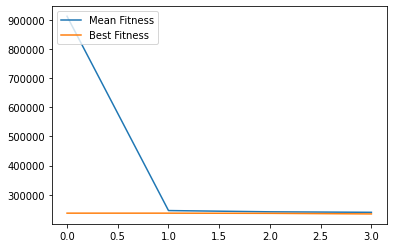

In [265]:
algo = r0733300()

algo.LAMBDA = 200  # Lambda represents the size of population
algo.MU = 200 # Mu represents the size of offsprings
algo.distanceMatrix = []  # distanceMatrix saves the cost between each two places
algo.K_TOURNAMENT_SIZE = 20  # this is the size of selection
algo.K_TOURNAMENT_SIZE_elimination = 20  # this is the size of selection
algo.alpha = 0.05  # alpha is the mutation rate
algo.iteration = 0  # iteration number
algo.converge = 0.018  # difference between mean and best evalue. If (mean- best)/best < converge, it converges.
algo.rank = 50
algo.rank_list = []
algo.s = 0.99999
algo.lsp_size = 1
algo.selectiveIni = 10

algo.selective_Diversify = 10
algo.alphaDiversity = 0.2
algo.K_TOURNAMENT_Size_Diversify = 5
algo.K_TOURNAMENT_SIZE_elimination_Diversify = 2
algo.LAMBDA_Diversify = 300

algo.optimizeElitism("tour1000(1).csv", initializaMethod=1)



## Diversity Main Loop

In [19]:
class r0733300(r0733300):
    def optimizeDiverisify(self, filename, initializaMethod):
        # Read distance matrix from file.
        file = open(filename)
        distanceMatrix = np.loadtxt(file, delimiter=",")
        self.distanceMatrix = distanceMatrix
        file.close()
        if(initializaMethod == 0):
            population = self.initialize(self.distanceMatrix, self.LAMBDA)
        elif(initializaMethod == 1):
            population  = self.selectiveInializationBatch(self.selectiveIni, self.LAMBDA) 
        elif (initializaMethod ==2):
            population = self.greedyInializationBatch(self.distanceMatrix, self.LAMBDA)

        population += self.greedyInializationBatch(self.distanceMatrix, 10)

        meanFitnesses = []
        bestFitnesses = []

        meanObjective = np.mean(np.asarray(population)[:,1])
        bestObjective = np.min(population,axis=0)[1]
        initialDiversity = self.calculateDiveristy(population)

        meanFitnesses.append((meanObjective))
        bestFitnesses.append(bestObjective)

        print(" Inital Mean Objectives : " + str(meanObjective))
        print(" Inital Best Objectives : " + str(bestObjective))
        print(" diversity         : " + str(self.calculateDiveristy(population)))
        
        start = time.time()
        while (time.time()-start <= 300):
            self.iteration += 1

            newOffsprings = []


            
            for i in tqdm(range(self.MU)):
            # for i in range(self.MU):
                p1 = self.k_tournament_selection(population,self.K_TOURNAMENT_SIZE)
                p2 = self.k_tournament_selection(population, self.K_TOURNAMENT_SIZE)
                # p1 = population[0]
                # p2 = population[1]
                while(True ): 
                    offspring1 = self.orderCrossover(p1, p2)
                    offspring2 = self.orderCrossover(p2, p1)
                    # offspring1 = self.recominbation_crossover(p1,p2)
                    # offspring2 = self.recominbation_crossover(p2, p1)

                    offspring1 = self.mutation_swap(offspring1, self.alpha)
                    offspring2 = self.mutation_swap(offspring2, self.alpha)

                    offspring1 = self.mutation_insert(offspring1, self.alpha)
                    offspring2 = self.mutation_insert(offspring2, self.alpha)

                    newOffsprings.append(offspring1)
                    newOffsprings.append(offspring2)
                    
                    if(offspring1[1] < min(p1[1], p2[1]) or offspring2[1] <= min(p1[1], p2[1]) or random.random() < self.alpha):
                        break

            
            # for i in population:
            #     i = self.mutation_swap(i, self.alpha)
            #     i = self.mutation_insert(i, self.alpha)


            population += newOffsprings
            population= self.eliminate_k_turnament(population,self.K_TOURNAMENT_SIZE_elimination)
        
            meanObjective = np.mean(np.asarray(population)[:,1])
            bestObjective = np.min(population,axis=0)[1]
            # bestSolution = population[np.argmin(objectives)]

            meanFitnesses.append((meanObjective))
            bestFitnesses.append(bestObjective)
            diversify = self.calculateDiveristy(population)
            
            print(self.iteration)
            print(" Mean Objectives : " + str(meanObjective))
            print(" Best Objectives : " + str(bestObjective))
            print(" diversity         : " + str(self.calculateDiveristy(population)))
            print("Time: " + str(time.time()-start))
            
            if(diversify >= 3* initialDiversity):
                print("  start diversifying")
            while(diversify >= 3 * initialDiversity):
                newPopulation = self.selectiveInializationBatch(self.selective_Diversify, self.LAMBDA_Diversify)
                newPopulation += self.initialize(self.distanceMatrix,self.LAMBDA_Diversify)
                # print("new Population" + str(self.calculateDiveristy(newPopulation)))
                
                # population += newPopulation
                newOffsprings = []
                
                for i in tqdm(range(self.MU)):
                    p1 = self.k_tournament_selection(population,self.K_TOURNAMENT_Size_Diversify)
                    p2 = self.k_tournament_selection(newPopulation, self.K_TOURNAMENT_Size_Diversify)
                    offspring1 = self.orderCrossover(p1, p2)
                    offspring2 = self.orderCrossover(p2, p1)

                    offspring1 = self.mutation_swap(offspring1, self.alphaDiversity)
                    offspring2 = self.mutation_swap(offspring2, self.alphaDiversity)

                    offspring1 = self.mutation_insert(offspring1, self.alphaDiversity)
                    offspring2 = self.mutation_insert(offspring2, self.alphaDiversity)

                    newOffsprings.append(offspring1)
                    newOffsprings.append(offspring2)
                
                population += newOffsprings
                # print("population size " + str(len(population)))
                population= self.eliminate_k_turnament(population,self.K_TOURNAMENT_SIZE_elimination_Diversify)
                # print("population size " + str(len(population)))
                diversify = self.calculateDiveristy(population)
                print("New diverisity:    " + str(diversify))


        self.plotFitness(meanFitnesses, bestFitnesses)

### Diversify Process

In [20]:
algo = r0733300()

algo.LAMBDA = 200  # Lambda represents the size of population
algo.MU = 200 # Mu represents the size of offsprings
algo.distanceMatrix = []  # distanceMatrix saves the cost between each two places
algo.K_TOURNAMENT_SIZE = 20  # this is the size of selection
algo.K_TOURNAMENT_SIZE_elimination = 20  # this is the size of selection
algo.alpha = 0.05  # alpha is the mutation rate
algo.iteration = 0  # iteration number
algo.converge = 0.018  # difference between mean and best evalue. If (mean- best)/best < converge, it converges.
algo.rank = 50
algo.rank_list = []
algo.s = 0.99999
algo.lsp_size = 1
algo.selectiveIni = 10

algo.selective_Diversify = 10
algo.alphaDiversity = 0.2
algo.K_TOURNAMENT_Size_Diversify = 5
algo.K_TOURNAMENT_SIZE_elimination_Diversify = 2
algo.LAMBDA_Diversify = 300

algo.optimizeDiverisify("tour500(1).csv", initializaMethod=1)



100%|██████████| 10/10 [00:01<00:00,  6.07it/s]
/tmp/ipykernel_77666/3663839432.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  meanObjective = np.mean(np.asarray(population)[:,1])
/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/tmp/ipykernel_77666/2574736038.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or s

 Inital Mean Objectives : inf
 Inital Best Objectives : 109810.01350000002
 diversity         : 0.01386127577234694


 34%|███▎      | 67/200 [00:11<00:22,  6.00it/s]


KeyboardInterrupt: 

## Original

### Oringal Main Loop

In [25]:
class r0733300(r0733300):
    def optimize(self, filename, initializaMethod):
        # Read distance matrix from file.
        file = open(filename)
        distanceMatrix = np.loadtxt(file, delimiter=",")
        self.distanceMatrix = distanceMatrix
        file.close()
        if(initializaMethod == 0):
            population = self.initialize(self.distanceMatrix, self.LAMBDA)
        elif(initializaMethod == 1):
            population  = self.selectiveInializationBatch(self.selectiveIni, self.LAMBDA) 
        elif (initializaMethod ==2):
            population = self.greedyInializationBatch(distanceMatrix, self.LAMBDA)
        
        # population += self.greedyInializationBatch(distanceMatrix)
        # elif (initializaMethod ==3) :
            # print(np.shape(population))

        # objectives = []

        # for individual in population:
        #     objectives.append(self.calculate_distance(individual))

        meanFitnesses = []
        bestFitnesses = []

        # meanObjective = np.mean(population,axis=0)[1]
        meanObjective = np.mean(np.asarray(population)[:,1])
        bestObjective = np.min(population,axis=0)[1]
        initialDiversity = self.calculateDiveristy(population)

        meanFitnesses.append((meanObjective))
        bestFitnesses.append(bestObjective)

        print(" Inital Mean Objectives : " + str(meanObjective))
        print(" Inital Best Objectives : " + str(bestObjective))
        print(" diversity         : " + str(initialDiversity))
        # print(" Initial Best Solution : " + str(bestSolution))
        
        start = time.time()
        while (time.time()-start <= 300):
            self.iteration += 1
            newOffsprings = []
            for i in tqdm(range(self.MU)):
                p1 = self.k_tournament_selection(population,self.K_TOURNAMENT_SIZE)
                p2 = self.k_tournament_selection(population, self.K_TOURNAMENT_SIZE)
                while(True ): 
                    offspring1 = self.orderCrossover(p1, p2)
                    offspring2 = self.orderCrossover(p2, p1)

                    offspring1 = self.mutation_swap(offspring1, self.alpha)
                    offspring2 = self.mutation_swap(offspring2, self.alpha)

                    offspring1 = self.mutation_insert(offspring1, self.alpha)
                    offspring2 = self.mutation_insert(offspring2, self.alpha)

                    newOffsprings.append(offspring1)
                    newOffsprings.append(offspring2)
                    
                    if(offspring1[1] < min(p1[1], p2[1]) or offspring2[1] <= min(p1[1], p2[1]) or random.random() < self.alpha):
                        break

            
            for i in population:
                i = self.mutation_swap(i, self.alpha)
                i = self.mutation_insert(i, self.alpha)


            population += newOffsprings
            population= self.eliminate_k_turnament(population,self.K_TOURNAMENT_SIZE_elimination)
        
            meanObjective = np.mean(np.asarray(population)[:,1])
            bestObjective = np.min(population,axis=0)[1]
            diversity = self.calculateDiveristy(population)
            # bestSolution = population[np.argmin(objectives)]

            meanFitnesses.append((meanObjective))
            bestFitnesses.append(bestObjective)
            
            
            print(self.iteration)
            print(" Mean Objectives : " + str(meanObjective))
            print(" Best Objectives : " + str(bestObjective))
            print(" diversity         : " + str(diversity))
            print("Time: " + str(time.time()-start))



        self.plotFitness(meanObjective, bestObjective)

In [122]:
# algo = r0733300();
# file = open("tour500(1).csv")
# distanceMatrix = np.loadtxt(file, delimiter=",")
# algo.distanceMatrix = distanceMatrix
# # pop = algo.selectiveInializationBatch(5)
# pop2 = algo.initialize(distanceMatrix)
# algo.orderCrossover(pop2[0], pop2[1])

### Original Process

In [23]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)        

In [47]:
algo = r0733300()

algo.LAMBDA = 200  # Lambda represents the size of population
algo.MU = 200 # Mu represents the size of offsprings
algo.distanceMatrix = []  # distanceMatrix saves the cost between each two places
algo.K_TOURNAMENT_SIZE = 20  # this is the size of selection
algo.K_TOURNAMENT_SIZE_elimination = 20  # this is the size of selection
algo.alpha = 0.05  # alpha is the mutation rate
algo.iteration = 0  # iteration number
algo.converge = 0.018  # difference between mean and best evalue. If (mean- best)/best < converge, it converges.
algo.rank = 50
algo.rank_list = []
algo.s = 0.99999
algo.lsp_size = 1
algo.selectiveIni = 10

algo.optimize("tour500(1).csv", initializaMethod=1)

100%|██████████| 200/200 [00:07<00:00, 25.32it/s]


 Inital Mean Objectives : inf
 Inital Best Objectives : 263981.2789999999
 diversity         : 0.01379848575135023


100%|██████████| 200/200 [00:05<00:00, 33.56it/s]


1
 Mean Objectives : 1235266835.2118123
 Best Objectives : 243596.3169999999
 diversity         : 0.03490295157317172
Time: 6.279402017593384


100%|██████████| 200/200 [00:21<00:00,  9.34it/s]


2
 Mean Objectives : 249638.20473499986
 Best Objectives : 238056.1519999999
 diversity         : 0.041785978857320036
Time: 27.99173402786255


100%|██████████| 200/200 [00:16<00:00, 12.20it/s]


3
 Mean Objectives : 240628.51277499995
 Best Objectives : 233627.96899999992
 diversity         : 0.04249565917543176
Time: 44.66198921203613


100%|██████████| 200/200 [00:23<00:00,  8.43it/s]


4
 Mean Objectives : 235297.1174
 Best Objectives : 227736.28199999977
 diversity         : 0.04360059919961916
Time: 68.7079610824585


100%|██████████| 200/200 [00:16<00:00, 11.89it/s]


5
 Mean Objectives : 230832.8511799998
 Best Objectives : 224494.1219999999
 diversity         : 0.04359239821041055
Time: 85.81514596939087


100%|██████████| 200/200 [00:20<00:00,  9.83it/s]


6
 Mean Objectives : 227000.36192999984
 Best Objectives : 222654.40199999994
 diversity         : 0.0436816673094646
Time: 106.45884013175964


100%|██████████| 200/200 [00:19<00:00, 10.25it/s]


7
 Mean Objectives : 224229.47229999982
 Best Objectives : 215964.92199999993
 diversity         : 0.04394610327283761
Time: 126.25204420089722


100%|██████████| 200/200 [00:21<00:00,  9.45it/s]


8
 Mean Objectives : 219302.48535499992
 Best Objectives : 214269.44199999992
 diversity         : 0.04409008793298677
Time: 147.69816613197327


100%|██████████| 200/200 [00:21<00:00,  9.40it/s]


9
 Mean Objectives : 215965.18912
 Best Objectives : 212784.40699999992
 diversity         : 0.044206572137853416
Time: 169.28549027442932


100%|██████████| 200/200 [00:18<00:00, 10.61it/s]


10
 Mean Objectives : 214244.84426499993
 Best Objectives : 210429.4719999999
 diversity         : 0.044173072528785294
Time: 188.4154770374298


100%|██████████| 200/200 [00:20<00:00,  9.55it/s]


11
 Mean Objectives : 212153.7103400001
 Best Objectives : 208073.36200000002
 diversity         : 0.044215463684024105
Time: 209.65127825737


100%|██████████| 200/200 [00:21<00:00,  9.23it/s]


12
 Mean Objectives : 209590.53237000006
 Best Objectives : 205796.592
 diversity         : 0.044231569843321085
Time: 231.6218192577362


100%|██████████| 200/200 [00:28<00:00,  7.10it/s]


13
 Mean Objectives : 207663.03921999998
 Best Objectives : 205506.602
 diversity         : 0.04429758542918923
Time: 260.06076312065125


100%|██████████| 200/200 [00:28<00:00,  7.07it/s]


14
 Mean Objectives : 207180.74673000007
 Best Objectives : 205096.066
 diversity         : 0.04436492963785442
Time: 288.6556873321533


100%|██████████| 200/200 [00:25<00:00,  7.81it/s]


15
 Mean Objectives : 206542.24215000003
 Best Objectives : 204806.076
 diversity         : 0.044311587144067244
Time: 314.54817628860474


TypeError: object of type 'numpy.float64' has no len()

<Figure size 432x288 with 0 Axes>

## Greedy Search

In [804]:
# Python3 program for the above approach

from typing import DefaultDict


INT_MAX = float("inf")	


# Function to find the minimum
# cost path for all the paths
def findMinRoute(tsp,k):
	length = len(tsp)
	# sum = 0
	counter = 0
	j = 0
	i = random.randrange(length)
	# i = random.randrange(length)
	min = INT_MAX
	min_city = 0
	visitedRouteList = DefaultDict(int)

	# Starting from the 0th indexed
	# city i.e., the first city
	visitedRouteList[i] = 1
	route = [0] * len(tsp)
	route[0] = i
	counter += 1

	# Traverse the adjacency
	# matrix tsp[][]
	# while i < len(tsp) and j < len(tsp[i]):
	while(counter <= length):

		# Corner of the Matrix
		if counter >= len(tsp[i])  :
			break

		# If this path is unvisited then
		# and if the cost is less then
		# update the cost
		if j != i and (visitedRouteList[j] == 0):
			# if tsp[i][j] < min and tsp[i][j] != float("inf"):
			if tsp[i][j] <= min:	
				# print(min)
				min = tsp[i][j]
				min_city = j
				# route[counter] = j

		j += 1

		# Check all paths from the
		# ith indexed city
		if j == len(tsp[i]):
			# sum += min
			min = INT_MAX
			visitedRouteList[min_city] = 1
			route[counter] = min_city
			j = 0
			i = route[counter]
			counter += 1
			min_city=0

	# Update the ending city in array
	# from city which was last visited
	# i = route[counter - 1]

	# for j in range(len(tsp)):

	# 	if (i != j) and tsp[i][j] < min:
	# 		min = tsp[i][j]
	# 		route[counter] = j

	# sum += tsp[route[0]][route[counter-1]]
	sum =0
	for i in range(len(route)-1):
		sum += tsp[route[i]][route[i+1]]
	sum += tsp[route[len(route)-1]][route[0]]

	# Started from the node where
	# we finished as well.
	print("Minimum Cost is :", sum)
	print(route)
	print(np.sort(route))


# Driver Code
file = open("tour100(1).csv")
tsp = np.loadtxt(file, delimiter=",")
findMinRoute(tsp,len(tsp))


Minimum Cost is : inf
[9, 4, 18, 48, 72, 42, 71, 54, 6, 97, 40, 34, 64, 24, 80, 91, 2, 53, 87, 13, 50, 3, 68, 16, 62, 63, 83, 96, 21, 26, 98, 39, 79, 0, 81, 29, 19, 22, 95, 37, 51, 92, 43, 59, 78, 93, 89, 41, 75, 90, 7, 76, 23, 35, 88, 45, 44, 57, 99, 65, 14, 5, 61, 74, 1, 70, 30, 60, 55, 85, 12, 94, 17, 69, 73, 58, 38, 10, 15, 28, 56, 82, 36, 20, 66, 31, 46, 33, 25, 52, 8, 32, 49, 11, 27, 86, 67, 77, 47, 84]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


In [ ]:
file = open("tour29(1).csv")
tsp = np.loadtxt(file, delimiter=",")
route = [2, 24, 15, 16, 9, 5, 8, 4, 0, 7, 27, 19, 3, 13, 14, 18, 12, 1, 23, 6, 10, 25, 28, 11, 20, 17, 21, 22, 26]
cost = 0

for i in range(0,len(route)-1):
    cost += tsp[route[i]][route[i+1]]

cost +=tsp[route[0]][route[-1]]
print(cost)

In [ ]:
file = open("tour1000(1).csv")
cost = 0
distanceMatrix = np.loadtxt(file, delimiter=",")
algo = r0733300()
random = algo.selectiveInialization(distanceMatrix, 20)
for i in range(len(random)-1):
    cost += distanceMatrix[random[i]][random[i+1]]
cost += distanceMatrix[random[0]][random[-1]]
print(cost)